In [8]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("new_degree.csv")
df.head()

,Unnamed: 0,gender,race,education,lunch,test preparation course,math,reading,writing,Average
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,some college,standard,none,76,78,75,76.333333


In [59]:
## I will try to create a model aiming to predict the score of the math course based on students features
df.drop(columns = ["Average", "Unnamed: 0"], axis=1, inplace=True)
df.head()
df_dum = pd.get_dummies(df)

In [60]:
## Get dummy data
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Gender"] = lb_make.fit_transform(df["gender"])
df["Race"] = lb_make.fit_transform(df["race"])
df["Education"] = lb_make.fit_transform(df["education"])
df["Preperation"] = lb_make.fit_transform(df["test preparation course"])


df = df[["math","reading", "writing", "Gender", "Race", "Education", "Preperation"]]
df.head()

,math,reading,writing,Gender,Race,Education,Preperation
0,72,72,74,0,1,1,1
1,69,90,88,0,2,4,0
2,90,95,93,0,1,3,1
3,47,57,44,1,0,0,1
4,76,78,75,1,2,4,1


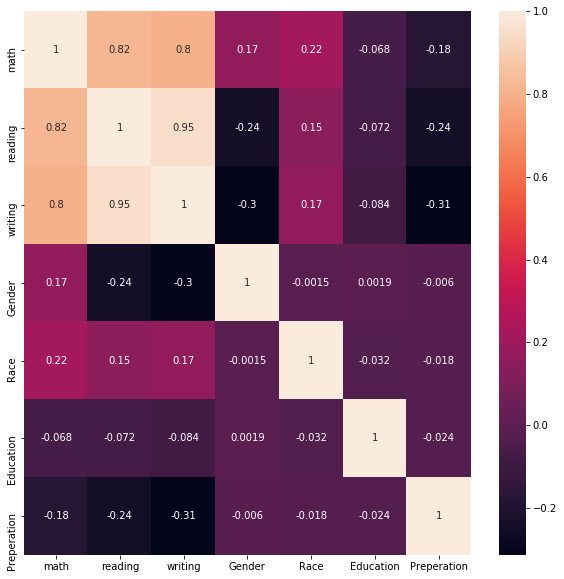

In [61]:
## Examine the correlation of our data features, with a Correlation Matrix 
plt.figure(figsize = (10,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [62]:
## Preparing the data before the splitting 
X = df_dum.drop("math", axis=1)
y = df.math.values

In [63]:
## Spltting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
## Exporte a summary and examine wich feature affected most the target value  
import statsmodels.api as sm

X_cm = X = sm.add_constant(X)
model = sm.OLS(y,X_cm)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     500.3
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:53:33   Log-Likelihood:                -3090.7
No. Observations:                1000   AIC:                             6211.
Df Residuals:                     985   BIC:                             6285.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.2160      0.338     -0.638      0.523      -0.880       0.448
reading                               0.2635      0.042      6.266      0.000       0.181       0.346
writing                               0.7016      0.044     16.120      0.000       0.616       0.787
gender_female                        -6.7282      0.287    -23.472      0.000      -7.291      -6.166
gender_male                           6.5122      0.210     30.950      0.000       6.099       6.925
race_group A                         -1.2811      0.487     -2.628      0.009      -2.238      -0.325
race_group B                         -0.4458      0.359     -1.240      0.215      -1.151       0.260
race_group C                         -1.1029      0.302     -3.648      0.000      -1.696      -0.510
race_group D                         -1.1827      0.339     -3.487      0.001      -1.848      -0.517
race_group E                          3.7966      0.415      9.143      0.000       2.982       4.611
education_associate's degree          0.1945      0.355      0.548      0.583      -0.501       0.890
education_bachelor's degree          -0.8524      0.462     -1.845      0.065      -1.759       0.054
education_high school                 0.7622      0.370      2.059      0.040       0.036       1.488
education_master's degree            -1.6616      0.624     -2.664      0.008      -2.886      -0.438
education_some college                0.5947      0.349      1.702      0.089      -0.091       1.280
education_some high school            0.7466      0.384      1.943      0.052      -0.007       1.501
lunch_free/reduced                   -1.7144      0.221     -7.770      0.000      -2.147      -1.281
lunch_standard                        1.4983      0.280      5.344      0.000       0.948       2.049
test preparation course_completed    -1.8592      0.303     -6.133      0.000      -2.454      -1.264
test preparation course_none          1.6431      0.210      7.831      0.000       1.231       2.055
==============================================================================
Omnibus:                        0.330   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.402
Skew:                          -0.034   Prob(JB):                        0.818
Kurtosis:                       2.930   Cond. No.                     1.23e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.55e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
##Initially, I'm traing a Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
accuracy = model.score(X_test, y_test)
print(accuracy)

0.8804332983749567


In [67]:
## Prediction
y_pred = model.predict(X_test)

## Compare the predicted scores with the actuals scores
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1.head()

,Actual,Predicted
0,91,76.387970
1,53,58.885970
2,80,76.990265
3,74,76.851804
4,84,87.627378


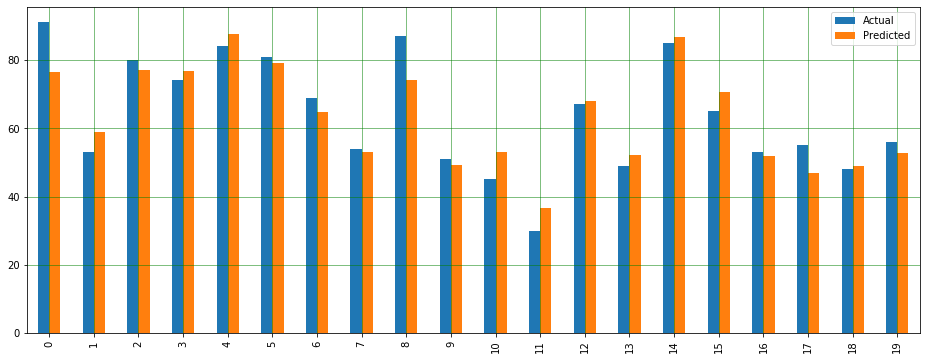

In [68]:
df2 = df1.head(20)
df2.plot(kind='bar',figsize=(16,6))
plt.grid(which="major", linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [69]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [70]:
## Evaluate the models using negative mean absolute error
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)
np.mean(scores)

-4.38534844836657

In [71]:
## The next model that I will train is a Random Forest algorithm
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [72]:
## Evaluation 
accuracy = forest_model.score(X_test, y_test)
print(accuracy)

0.8496466221268407


In [73]:
y2_pred = forest_model.predict(X_test)


In [74]:
## Negative mean absolute error
scores_2 = cross_val_score(forest_model, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)
np.mean(scores_2)

-4.969210878319394

In [75]:
## Lasso regression
from sklearn.linear_model import Lasso

las_model = Lasso()

scores_3 = cross_val_score(las_model, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)
np.mean(scores_3)

-5.155198036880054

In [76]:
## I will try to reduce the error finding a better alpha

alpha = []
error = []

for i in range (1,100):
    alpha.append(i/100)
    la = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(la, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)))
    

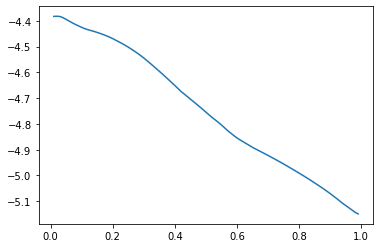

In [77]:
plt.plot(alpha, error)

In [78]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns = ["Aplha", "Error"])
df_err[df_err.Error == max(df_err.Error)]

,Aplha,Error
1,0.02,-4.38192


In [79]:
lasso_impr = Lasso(alpha=0.02)
lasso_impr.fit(X_train, y_train)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
## Tune models GridsearchCV, I will try to improve the Random Forest model, finding the best parameters.
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators":range(10,200,10), "criterion":("mse", "mae"), "max_features":("auto", "sqrt", "log2")}

In [81]:
gs = GridSearchCV(forest_model, parameters, scoring="neg_mean_absolute_error", cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [82]:
gs.best_score_

-4.899720400829213

In [83]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [84]:
## Test ansembles
tpred_linear = model.predict(X_test)
tpred_lasso = lasso_impr.predict(X_test)
tpred_rand_for = gs.best_estimator_.predict(X_test)

In [85]:
## Examine the mean absolute error and pick the model which has the best results.
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, tpred_linear))
print(mean_absolute_error(y_test, tpred_lasso)) 
print(mean_absolute_error(y_test, tpred_rand_for))

4.214763142474848
4.196016677309714
4.600826923076923


In [86]:
## Save the model
import pickle

In [87]:
with open("degrees_pred.pkl", "wb") as f:
     pickle.dump(lasso_impr,f)

In [88]:
## Load the model
with open("degrees_pred.pkl", "rb") as f:
    loaded_lasso = pickle.load(f)

In [89]:
## Lets make a prediction

In [90]:
new_student = [70,75,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1]

In [91]:
loaded_lasso.predict([new_student])

array([75.56089091])